# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [140]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

670

In [141]:
#Print cities with coordinates
pprint(city_info)

{'abeche': {'Lat': 13.793195593679712, 'Long': 21.217123278498207},
 'abu dhabi': {'Lat': 24.86243375633876, 'Long': 54.538679975463424},
 'acapulco': {'Lat': 5.65054208335836, 'Long': -103.24929901458503},
 'agadir': {'Lat': 30.929025208686667, 'Long': -10.372776267215386},
 'agnibilekrou': {'Lat': 6.701953522534282, 'Long': -2.926190254046304},
 'ahipara': {'Lat': -33.871869858013255, 'Long': 169.3963718122451},
 'airai': {'Lat': 10.612541817465669, 'Long': 134.4909137210712},
 'ajdabiya': {'Lat': 29.641969922557692, 'Long': 18.91811771594797},
 'aklavik': {'Lat': 66.49602329051169, 'Long': -134.62080850132287},
 'aksu': {'Lat': 41.16104952099383, 'Long': 80.4374217679395},
 'alamos': {'Lat': 26.579216200364073, 'Long': -109.0422739914979},
 'albany': {'Lat': -63.068396449264, 'Long': 118.85975570563897},
 'alice springs': {'Lat': -27.724592292659928, 'Long': 135.19883691928055},
 'along': {'Lat': 30.035367315537684, 'Long': 93.85696654023167},
 'alotau': {'Lat': -8.690341299794198, 

In [142]:
#Create dataframe
weather_df = pd.DataFrame(columns=["Id", "City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Save config information
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="

#Get the date for our chart. Putting in same cell as API call, so we know it matches the date when the data was requested
pretty_date = time.strftime("%x", time.localtime())

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

#set starting row for dataframe
row=0

for city in cities:
        try:
            query_url = base_url + city

            # Get current weather
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            #Set variables from result.
            city_id = weather_json["id"]
            city_name = weather_json["name"]
            country = weather_json["sys"]["country"]            
            cloudiness = weather_json["clouds"]["all"]
            humidity = weather_json["main"]["humidity"]
            current_time = weather_json["dt"]
            lat = weather_json["coord"]["lat"]
            lon = weather_json["coord"]["lon"]
            max_temp = weather_json["main"]["temp_max"]
            wind_speed = weather_json["wind"]["speed"]

            #add rows to dataframe
            weather_df.loc[row] = [city_id, city_name, country, lat, lon, max_temp, cloudiness, current_time, humidity, wind_speed]

            print(f'The current summary for {city} is: \n      cloudiness: {cloudiness}, temp:{max_temp}\n')

            row+=1
        
        #Checking to make sure the City exists
        except(KeyError):
            print(f"{city} not found. Skipping...\n")

rawah not found. Skipping...

yertsevo not found. Skipping...

deniliquin not found. Skipping...

mataura not found. Skipping...

barrow not found. Skipping...

dunedin not found. Skipping...

san patricio not found. Skipping...

hermanus not found. Skipping...

luderitz not found. Skipping...

tamboril not found. Skipping...

rikitea not found. Skipping...

victoria not found. Skipping...

khatanga not found. Skipping...

avarua not found. Skipping...

taoudenni not found. Skipping...

jamestown not found. Skipping...

sibolga not found. Skipping...

sentyabrskiy not found. Skipping...

alyangula not found. Skipping...

tuktoyaktuk not found. Skipping...

kloulklubed not found. Skipping...

castro not found. Skipping...

hobart not found. Skipping...

wilmington not found. Skipping...

cidreira not found. Skipping...

fuling not found. Skipping...

olafsvik not found. Skipping...

axim not found. Skipping...

tsihombe not found. Skipping...

atuona not found. Skipping...

atar not fou

feijo not found. Skipping...

elk city not found. Skipping...

luba not found. Skipping...

bulgan not found. Skipping...

aswan not found. Skipping...

angoche not found. Skipping...

kaithal not found. Skipping...

sanski most not found. Skipping...

aranda de duero not found. Skipping...

avera not found. Skipping...

karaul not found. Skipping...

chimbote not found. Skipping...

umm kaddadah not found. Skipping...

korla not found. Skipping...

thompson not found. Skipping...

yulara not found. Skipping...

wewak not found. Skipping...

zeya not found. Skipping...

dingle not found. Skipping...

sakaiminato not found. Skipping...

barcelos not found. Skipping...

kaeo not found. Skipping...



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [94]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Max_Temperature': temp_max,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind_Speed': wind})
#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')



In [95]:
# Display the final dataframe
city_data_df.head()

,City,Latitude,Longitude,Max_Temperature,Humidity,Cloudiness,Wind_Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.savefig("LatitudeTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

In [ ]:

plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor="black", linewidth = .75, color="mediumpurple")
plt.title("City Latitude vs Humidity (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("LatitudeHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

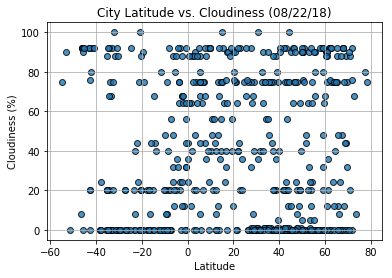

In [8]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("LatitudeCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

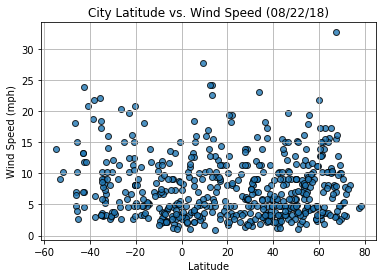

In [9]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("LatitudeWind.png")
plt.show()